Import the required modules

In [2]:
import pandas as pd
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from PIL import Image
import string
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

Load IMDB data

In [4]:
data = pd.read_csv('IMDB Dataset.csv')

Check some information about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Check the first 5 rows of the data

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

Data preprocessing

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
'''
Preprocess a data in the review column by removing punctuations, convert to lowercase, remove tags, remove stopwords and stemmitize the words

'''
def text_engr(word):
    ## remove punctuations and convert to lowercase
    word = re.sub('<br\s?\/>|<br>|\.|[^\w\s]|\d+', '',word)
    word = re.sub(r'[\"\#\$\%\&\'\(\)\*\+\/\:\;\<\=\>\@\[\\\]\^\_\`\{\|\}\~]', '', word)
    word = word.lower()
    ## remove tags
    word = re.sub('<br\s?\/>|<br>', '',word)
    ## remove hyperlink
    word = str(word.split('https')[0])
    word = word.strip()
    return word

In [11]:
data["review"] = data["review"].apply(lambda x: text_engr(x))

Remove Stopwords

In [12]:
data['review'] = data['review'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))


Let us see the lingustic feature of the train dataset
- This includes the Parts of Speech (POS) tags, word count, character count word density and frequency distribution of words in the training data

Split the data into train data with 40,000 rows and test data with 10,000 rows

In [13]:
train_data = data[:40000]
test_data = data[40000:]

In [14]:
all_words = ' '.join([text for text in train_data['review']])

In [15]:
import spacy
 
#load the small English model
nlp = spacy.load("en_core_web_sm")
 
#list to store the tokens and pos tags 
token = []
pos = []
 
for sent in nlp.pipe(train_data['review']):
    if sent.has_annotation('DEP'):
        #add the tokens present in the sentence to the token list
        token.append([word.text for word in sent])
        #add the pos tage for each token to the pos list
        pos.append([word.pos_ for word in sent])


In [16]:
train_data['token'] = token 
train_data['pos'] = pos

In [18]:
train_data['char_count'] = train_data['review'].apply(len)
train_data['word_count'] = train_data['review'].apply(lambda x: len(x.split()))
train_data['word_density'] = train_data['char_count'] / (train_data['word_count']+1)

Visialize the word counts and character counts

In [19]:
x1 = train_data.loc[train_data['sentiment']=='positive']['char_count']
x2 = train_data.loc[train_data['sentiment'] == 'negative']['char_count']
group_labels = ['positive', 'negative']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot(
    [x1, x2], group_labels,colors=colors)

fig.update_layout(title_text='Charater counts in the dataset', template="plotly_white")
fig.show()

Distribution of word count

In [20]:
x1 = train_data.loc[train_data['sentiment']=='positive']['word_count']
x2 = train_data.loc[train_data['sentiment'] == 'negative']['word_count']
group_labels = ['positive', 'negative']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot(
    [x1, x2], group_labels,colors=colors)

fig.update_layout(title_text='Word counts in the dataset', template="plotly_white")
fig.show()

In [21]:
train_data.head()

,review,sentiment,token,pos,char_count,word_count,word_density
0,one reviewers mentioned watching oz episode yo...,positive,"[one, reviewers, mentioned, watching, oz, epis...","[NUM, NOUN, VERB, VERB, INTJ, VERB, PRON, AUX,...",1157,167,6.886905
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...","[ADJ, ADJ, NOUN, NOUN, NOUN, VERB, ADJ, NOUN, ...",656,84,7.717647
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[VERB, ADJ, NOUN, VERB, NOUN, ADJ, NOUN, NOUN,...",587,85,6.825581
3,basically theres family little boy jake thinks...,negative,"[basically, there, s, family, little, boy, jak...","[ADV, PRON, VERB, NOUN, ADJ, NOUN, PROPN, VERB...",456,66,6.805970
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...","[NOUN, NOUN, NOUN, NOUN, NOUN, ADV, ADJ, NOUN,...",863,125,6.849206


Frequency distribution of the top 20 tokens in train_data

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from yellowbrick.text import FreqDistVisualizer

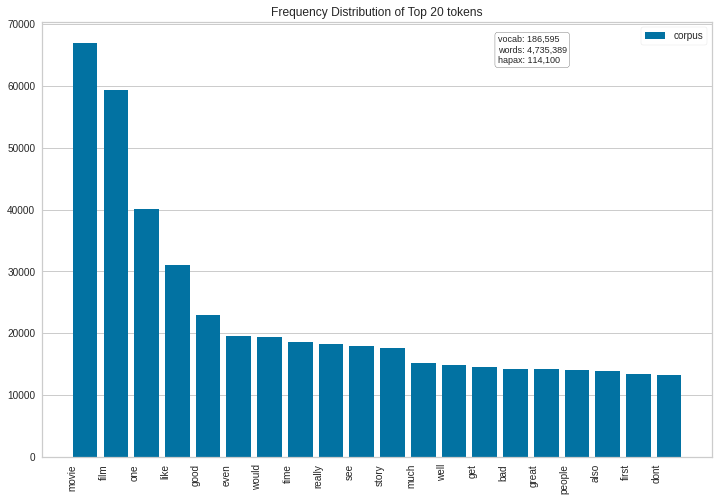

In [62]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(train_data.review)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features,fig = plt.figure(figsize = (12,8)), n=20,orient='v')
visualizer.fit(docs)
visualizer.show()

Displaying the proportion of the reviews that are positive and negative sentiments

positive    25000
negative    25000
Name: sentiment, dtype: int64


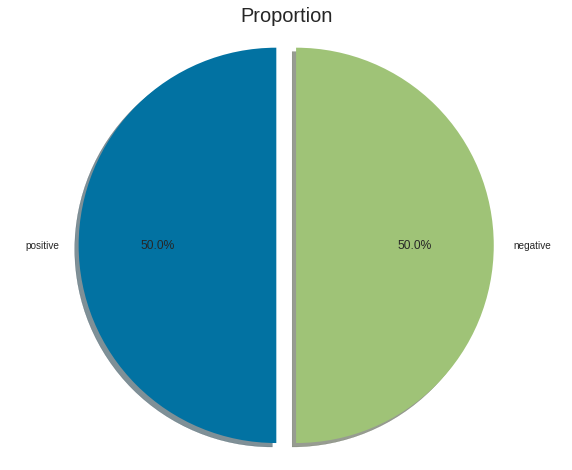

In [25]:
print(data.sentiment.value_counts())
labels = 'positive', 'negative'
sizes = [data.sentiment[data['sentiment']=='positive'].count(),data.sentiment[data['sentiment']=='negative'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

**Observations**
- The dataset is balance between positive and negative sentiments

Stemmatize text with PorterStemmer

In [26]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
ps=PorterStemmer()

In [28]:
def stem(text):
    L=[]
    for i in text.split():
        L.append(ps.stem(i))
        
        
    string=" ".join(L)    
    return string

In [29]:
#applying stemming
data.review=data.review.apply(stem)

In [30]:
data['sentiment'] = data['sentiment'].replace({'positive':1,'negative':0})

Use CountVectorizer to vectorize the whole dataset

In [31]:
cv = CountVectorizer(max_features = 4000,ngram_range=(1,3))

In [32]:
vector=cv.fit_transform(data.review)

Convert the vector to an array

In [33]:
vector=vector.toarray()
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Split data into training and test dataset for model training and testing

In [34]:
X_train=vector[0:40000]
Y_train=data.sentiment[0:40000]
X_test=vector[40000:]
Y_test=data.sentiment[40000:]

Building the Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,confusion_matrix,classification_report

In [36]:

dict_classifiers = {
    "LogisiticRegression":LogisticRegression(random_state = 1),
    }

In [37]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(40000, 4000) (40000,) (10000, 4000) (10000,)


In [38]:
def evaluation_matrix(model, Xtest, ytest):
    y_pred = model.predict(Xtest)
    accuracy = accuracy_score(ytest, y_pred)
    print('Accuracy: %f' % accuracy)
    precision = precision_score(ytest, y_pred, average='weighted')
    print('Precision: %f' % precision)
    recall = recall_score(ytest, y_pred, average='weighted')
    print('Recall: %f' % recall)
    f1 = f1_score(ytest, y_pred, average='weighted')
    print('F1 score: %f' % f1)
    kappa = cohen_kappa_score(ytest, y_pred)
    print('Cohens kappa: %f' % kappa)
    #confusion matrix
    matrix = confusion_matrix(ytest, y_pred)
    print(matrix)
  
    return accuracy, precision, recall, f1, kappa

In [39]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 1, verbose = True):
   
    
    dict_models = {}
    for classifier_name,classifier in list(dict_classifiers.items())[:no_classifiers]:
        classifier.fit(X_train, Y_train)
        accuracy, precision, recall, f1, kappa = evaluation_matrix(classifier, X_train, Y_train)
        dict_models[classifier_name] = {'model': classifier, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'Kappa': kappa}          
    return dict_models

In [40]:
def display_dict_models(dict_models, sort_by='Accuracy',ascending=False):
    cls = [key for key in dict_models.keys()]
    accuracy = [dict_models[key]['Accuracy'] for key in cls]
    precision = [dict_models[key]['Precision'] for key in cls]
    recall = [dict_models[key]['Recall'] for key in cls]
    f1 = [dict_models[key]['F1'] for key in cls]
    kappa = [dict_models[key]['Kappa'] for key in cls]
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),6)), columns = ['classifier', 'Accuracy', 'Precision', 'Recall', 'F1', 'Kappa'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'Accuracy'] = accuracy[ii]
        df_.loc[ii, 'Precision'] = precision[ii]
        df_.loc[ii, 'Recall'] = recall[ii]
        df_.loc[ii, 'F1'] = f1[ii]
        df_.loc[ii, 'Kappa'] = kappa[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))
    return df_

Model Performance on Train Data

In [41]:
models = batch_classify(X_train, Y_train, X_test, Y_test)

Accuracy: 0.924025
Precision: 0.924066
Recall: 0.924025
F1 score: 0.924023
Cohens kappa: 0.848051
[[18389  1618]
 [ 1421 18572]]


In [42]:
df = display_dict_models(models)
df.reset_index(drop = True, inplace = True)

,classifier,Accuracy,Precision,Recall,F1,Kappa
0,LogisiticRegression,0.924025,0.924066,0.924025,0.924023,0.848051


The accuracy of the model on train data is 92.4%. Let us tune the hyperparameter to ensure the model performance is generalized

Cross Validation Score

In [43]:
classifier_score = cross_val_score(LogisticRegression(), X_train,Y_train, scoring = 'accuracy', cv = 10) 

In [44]:
classifier_score

array([0.8685 , 0.87125, 0.866  , 0.8645 , 0.868  , 0.8645 , 0.8845 ,
       0.86725, 0.8715 , 0.87075])

In [45]:
classifier_score.mean()

0.869675

After cross validation, although the accuracy of the model reduced to an average of 87%, the model is more generalized.

Model performance on Test Data

In [65]:
# Creating metric function 
def metrics_score(Y_test,pred):
    print(classification_report(Y_test,pred))

    cm = confusion_matrix(Y_test,pred)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4993
           1       0.87      0.87      0.87      5007

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



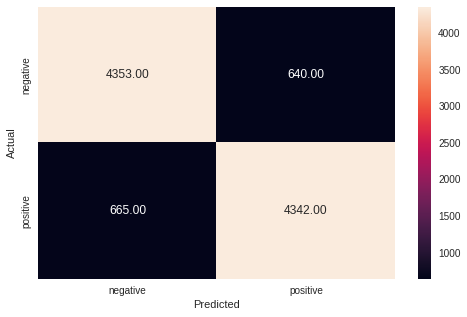

None


In [66]:
classifier = LogisticRegression()
from sklearn import metrics
import numpy as np
import itertools
classifier.fit(X_train,Y_train)
pred = classifier.predict(X_test)
cm = metrics_score(Y_test,pred)
print(cm)